# 🏡 Ridge Regression (L2) no California Housing Dataset

## 📌 Sobre o Dataset
O **California Housing Dataset** contém informações sobre imóveis na Califórnia, sendo amplamente utilizado para prever preços de casas. Ele inclui:

- 📏 **Área do lote**
- 🏡 **Número médio de quartos por domicílio**
- 📍 **Localização geográfica**
- 📊 **Média da renda e idade das construções**
- 💰 **Valor médio da casa (variável alvo)**

---

## 🚀 O que este código faz?
✔ **Carrega e analisa o California Housing Dataset**  
✔ **Gera um heatmap para visualizar correlações entre variáveis**  
✔ **Realiza o tratamento de dados e normalização**  
✔ **Treina um modelo de Ridge Regression (L2)**  
✔ **Avalia o modelo com MSE, RMSE, R² e acurácia aproximada**  
✔ **Gera gráficos de erro e comparação de previsões**  
✔ **Exibe a importância das features para o modelo**  

---

## 🛠️ Como rodar o código?
```bash
pip install numpy pandas scikit-learn seaborn matplotlib
python ridge_regression_california.py
```

---

## 📊 Visualizações incluídas
- **Heatmap de correlação** entre variáveis
- **Comparação entre valores reais e previstos**
- **Distribuição dos erros de previsão**
- **Importância das features no modelo Ridge**

---

## 📈 Avaliação do Modelo
Após o treinamento, o modelo é avaliado com as seguintes métricas:
- **MSE (Erro Quadrático Médio)**
- **RMSE (Raiz do Erro Quadrático Médio)**
- **R² Score (Coeficiente de Determinação)**
- **Acurácia aproximada** (baseada na variância dos valores reais)

Se precisar de ajustes ou melhorias, basta modificar os hiperparâmetros do modelo! 🚀



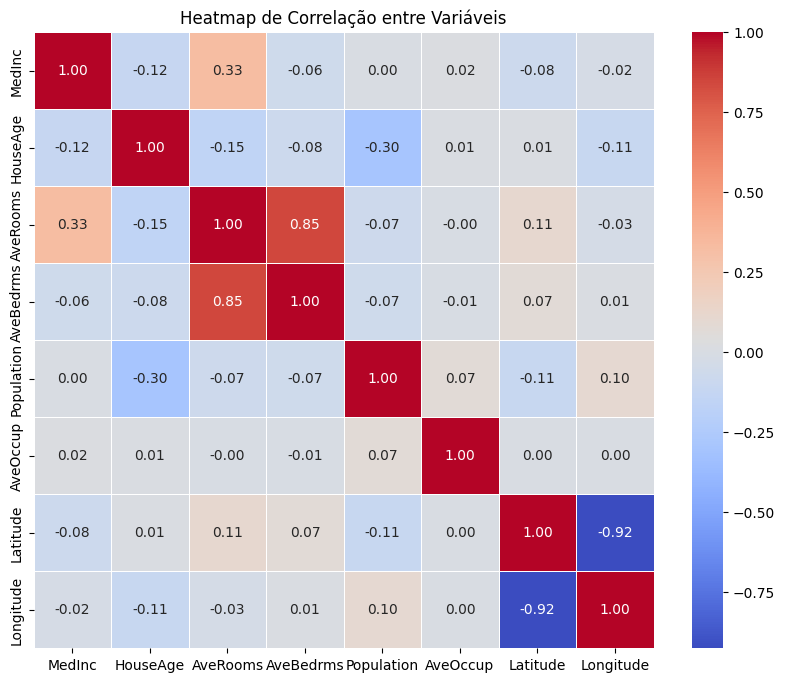

MSE: 0.5559
RMSE: 0.7456
R² Score: 0.5758
Acurácia Aproximada: 57.58%


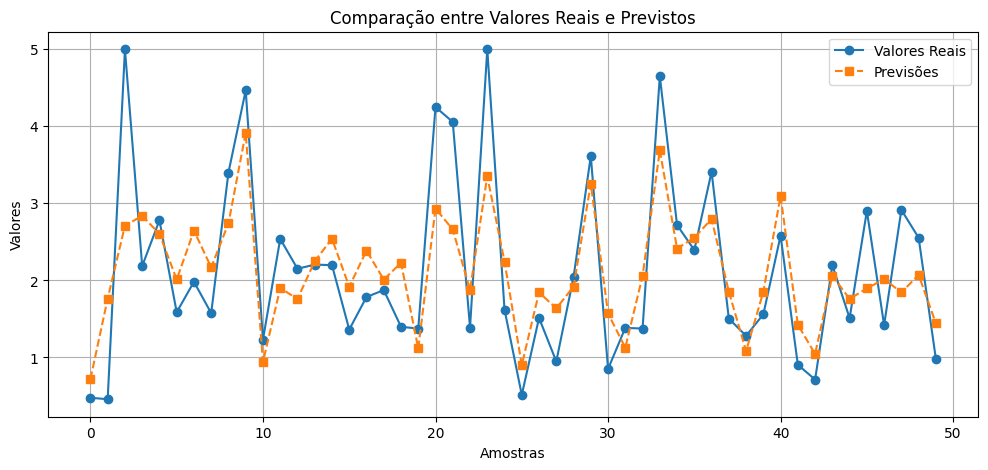

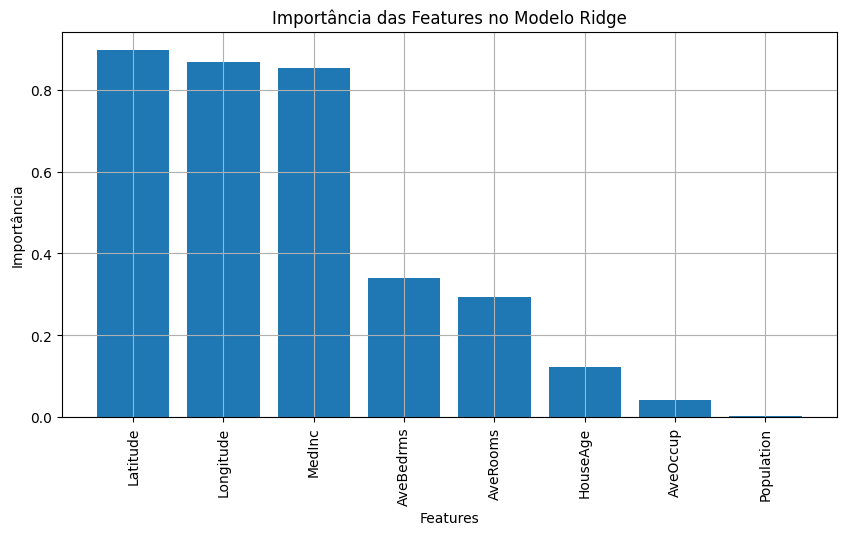

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Carregar o conjunto de dados
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Exibir um heatmap das correlações
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap de Correlação entre Variáveis")
plt.show()

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar e treinar o modelo Ridge Regression com L2
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = ridge.predict(X_test_scaled)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy = (1 - (mse / np.var(y_test))) * 100  # Aproximação da precisão para regressão

# Exibir métricas
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Acurácia Aproximada: {accuracy:.2f}%")

# Visualização dos resultados
plt.figure(figsize=(12, 5))
plt.plot(y_test[:50], label="Valores Reais", marker='o')
plt.plot(y_pred[:50], label="Previsões", marker='s', linestyle='dashed')
plt.xlabel("Amostras")
plt.ylabel("Valores")
plt.title("Comparação entre Valores Reais e Previstos")
plt.legend()
plt.grid()
plt.show()

# Importância das Features
importances = np.abs(ridge.coef_)
features = california.feature_names
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(features)), importances[sorted_indices], align='center')
plt.xticks(range(len(features)), np.array(features)[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importância")
plt.title("Importância das Features no Modelo Ridge")
plt.grid()
plt.show()